The dataset used is a unbalanced dataset. Here i'm going to explain how to standardized variable, how to create PCA and how to work on unbalanced dataset.

In [1]:
#importing all required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter

In [2]:
#Importing the dataset
data=pd.read_csv("K:\ML\Github\Breast_Cancer\Breast_Cancer_Data.csv")

In [3]:
data.isnull().sum()
#checking for any missing values

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [4]:
data.head()
#there are total 32 columns.
#As we can see, all Variables are not standardized. Some are 0's and some are in 100's
#PCA will be affected, if our variables are not scaled to same level
#Target variable is "diagnosis", where 0 means "normal" and 1 means "Cancer"

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
#let's try to learn more about the data.
data.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.052724,14.127292,19.289649,91.991511,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.223679,3.524049,4.301036,24.300487,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,0.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
#let's check the distribution of the target variable 'diagnosis'
Counter(data['diagnosis'])

#This is the example of highly imbalanced dataset
#Where proportion of 1 is very less compared to 0's

Counter({0L: 539, 1L: 30})

In [7]:
count_target = pd.value_counts(data['diagnosis'])

Text(0.5,0,u'Target Class')

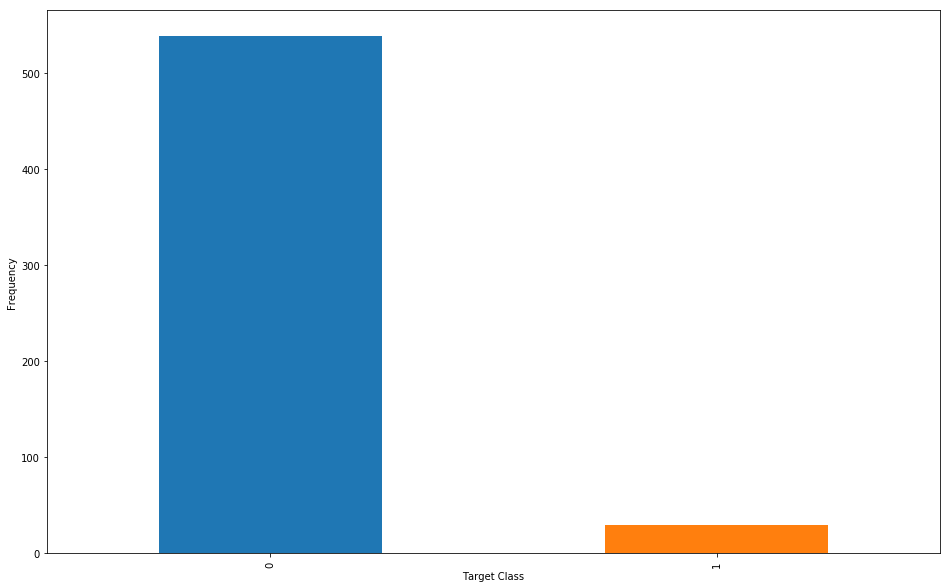

In [8]:
plt.figure(figsize=(16,10))
count_target.plot(kind='bar')
plt.ylabel('Frequency')
plt.xlabel('Target Class')

#Where proportion of 1 is very less compared to 0's

# Lets standardize the variables

In [9]:
#Column "ID" is not important, let's drop it
data = data.drop(['id'], axis=1)

In [10]:
#saving the target column 'diagnosis' in separate DF
target=data['diagnosis']

In [11]:
#Dropping the target variable, to create PC for ramining variables
data_var = data.drop(['diagnosis'], axis=1)

In [12]:
col=data_var.columns
col

Index([u'radius_mean', u'texture_mean', u'perimeter_mean', u'area_mean',
       u'smoothness_mean', u'compactness_mean', u'concavity_mean',
       u'concave points_mean', u'symmetry_mean', u'fractal_dimension_mean',
       u'radius_se', u'texture_se', u'perimeter_se', u'area_se',
       u'smoothness_se', u'compactness_se', u'concavity_se',
       u'concave points_se', u'symmetry_se', u'fractal_dimension_se',
       u'radius_worst', u'texture_worst', u'perimeter_worst', u'area_worst',
       u'smoothness_worst', u'compactness_worst', u'concavity_worst',
       u'concave points_worst', u'symmetry_worst', u'fractal_dimension_worst'],
      dtype='object')

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [14]:
#Standardizing the all the variables to same level
data_std=sc.fit_transform(data[col])

In [15]:
data_final=pd.DataFrame(data=data_std, columns=col)

In [16]:
data_final=pd.concat([data_final,target],axis=1)

In [17]:
data_final.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,1.097064,-2.073335,1.268929,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,1
1,1.829821,-0.353632,1.684924,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,0
2,1.579888,0.456187,1.565480,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,0
3,-0.768909,0.253732,-0.593576,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,0
4,1.750297,-1.151816,1.775537,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,0


# Creating Principal Components

In [18]:
from sklearn.decomposition import PCA

In [19]:
#From 32 columns i'm creating 10 principal components "PC1 ot PC10"
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(data_std)
data_pca = pd.DataFrame(data = principalComponents
             , columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])

In [20]:
#Merging the PC and target variables into single DF
data_final=pd.concat([data_pca,target],axis=1)

In [21]:
#The final DF will have 10 Principal components and 1 target varible
data_final.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,diagnosis
0,9.192787,1.948495,-1.123134,3.633519,-1.196361,1.411751,2.158565,-0.398457,-0.156937,-0.877233,1
1,2.387372,-3.768254,-0.529212,1.118284,0.621436,0.028609,0.013702,0.240737,-0.711834,1.107161,0
2,5.733607,-1.075201,-0.551674,0.911994,-0.177461,0.541477,-0.668308,0.097394,0.024054,0.454707,0
3,7.123148,10.275538,-3.233084,0.152239,-2.960113,3.053563,1.428810,1.058848,-1.408243,-1.116057,0
4,3.934887,-1.948179,1.389734,2.940752,0.546273,-1.226569,-0.935869,0.636289,-0.263884,0.377574,0


In [22]:
data_final.describe()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,diagnosis
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,569.000000
mean,2.060449e-16,4.916981e-17,-3.863342e-17,8.038873e-17,1.726797e-17,4.448697e-17,4.175531e-17,9.990056e-17,9.921765e-17,-3.726759e-17,0.052724
std,3.647410e+00,2.387894e+00,1.680154e+00,1.408596e+00,1.285198e+00,1.099761e+00,8.223866e-01,6.909837e-01,6.464175e-01,5.926851e-01,0.223679
min,-5.565961e+00,-7.775516e+00,-4.880458e+00,-5.134082e+00,-4.788509e+00,-4.218172e+00,-4.083855e+00,-3.953887e+00,-2.968986e+00,-2.738905e+00,0.000000
25%,-2.757652e+00,-1.499750e+00,-1.016977e+00,-7.865539e-01,-6.160854e-01,-7.280749e-01,-4.481321e-01,-3.731364e-01,-3.238111e-01,-3.664604e-01,0.000000
50%,-1.174111e+00,-1.959114e-01,-1.554947e-01,1.153786e-01,-2.882584e-02,-7.245341e-02,-1.761524e-02,1.367359e-02,1.235986e-02,2.498267e-03,0.000000
75%,2.508592e+00,1.228054e+00,8.570429e-01,9.700354e-01,6.105040e-01,6.170851e-01,4.541213e-01,3.497774e-01,3.622375e-01,3.263410e-01,0.000000
max,1.631891e+01,1.257291e+01,1.011290e+01,5.193602e+00,7.490922e+00,5.134282e+00,5.416334e+00,4.362052e+00,3.783547e+00,3.192191e+00,1.000000


# Split the data into x and y variables

In [23]:
X = data_final.loc[:, data_final.columns!= 'diagnosis']
y = data_final.loc[:, data_final.columns == 'diagnosis']

In [24]:
X.columns

Index([u'PC1', u'PC2', u'PC3', u'PC4', u'PC5', u'PC6', u'PC7', u'PC8', u'PC9',
       u'PC10'],
      dtype='object')

In [25]:
y.columns

Index([u'diagnosis'], dtype='object')

In [26]:
#Split the data into train and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state = 1)

Undersampling - The process of reducing the class instances of the MAJORITY class is called Undersampling. I will attempt to undersample the data and give a 50/50 ratio to each of the class's instances.

In [27]:
#1. Find the number of the minority class
number_cancer = len(data_final[data_final['diagnosis']==1])
number_non_cancer = len(data_final[data_final['diagnosis']==0])

In [28]:
print(number_cancer)
print(number_non_cancer)

30
539


In [29]:
#2. Find the indices of the majority and minority class
index_non_cancer = data_final[data_final['diagnosis']==0].index
index_cancer = data_final[data_final['diagnosis']==1].index

In [30]:
#4. Randomly sample the majority indices with respect to the number of minority classes
random_indices = np.random.choice(index_non_cancer, number_cancer,replace='False')

In [31]:
len(random_indices)

30

In [32]:
#5. Concat the minority indices with the indices from step 4
under_sample_indices = np.concatenate([index_cancer,random_indices])

In [33]:
#Get the balanced dataframe - This is the final undersampled data
under_sample_df = data_final.iloc[under_sample_indices]

In [34]:
under_sample_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,diagnosis
0,9.192787,1.948495,-1.123134,3.633519,-1.196361,1.411751,2.158565,-0.398457,-0.156937,-0.877233,1
12,8.184812,2.700861,5.730111,-1.111752,1.044363,2.594552,0.941159,-3.322215,-0.748352,0.396760,1
25,7.098410,2.018723,-0.028998,2.587586,-2.040049,1.184395,0.601381,-1.307080,1.100767,2.286893,1
30,6.059203,-0.757071,-0.349086,-1.064412,-0.746254,0.242169,0.461882,-0.291949,0.285195,0.117960,1
77,6.230736,0.919988,0.089812,2.539194,0.061408,0.683617,1.399638,0.719842,-0.096975,0.509249,1
78,11.668431,4.748581,2.005744,0.318663,-3.390449,4.880821,-1.156625,0.482857,-1.174169,-1.324179,1
82,10.768867,-2.258415,0.038929,-0.389103,1.187300,-2.188205,0.035926,-0.548134,-1.648536,0.396524,1
108,13.055936,0.981379,0.598912,1.472849,-0.600635,1.021944,-0.096110,-0.768362,0.628183,-1.099030,1
122,12.894156,2.316628,6.328609,1.941946,-3.159752,-0.947076,-1.297060,0.792061,-1.697165,-0.078249,1
168,5.069511,-1.785012,1.173866,-0.693665,0.647939,-1.978205,1.598819,-0.479111,0.660523,-0.599747,1


In [35]:
Counter(under_sample_df['diagnosis'])
#Now we can see that both the classes are in same proportion
#Majority classes are undersampled to the no. of minority classes count

Counter({0L: 30, 1L: 30})

In [36]:
#Now, split the data into x, y, train, and test
x_under = under_sample_df.loc[:, under_sample_df.columns!='diagnosis']
y_under = under_sample_df.loc[:, under_sample_df.columns=='diagnosis']

#Run a logistic regression for Under sampled data

In [37]:
from sklearn.linear_model import LogisticRegression
lr_under=LogisticRegression()
x_under_train, x_under_test, y_under_train, y_under_test = train_test_split(x_under, y_under, test_size=0.3, random_state=1)
lr_under.fit(x_under_train, y_under_train)

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [38]:
under_predict_train = lr_under.predict(x_under_train)
under_predict_test = lr_under.predict(x_under_test)
under_predict_utest = lr_under.predict(x_test)

In [39]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import classification_report,confusion_matrix
lr_under_accuracy_train = accuracy_score(y_under_train,under_predict_train)
lr_under_recall_train = recall_score(y_under_train,under_predict_train)
lr_under_precision_train = recall_score(y_under_train,under_predict_train)
lr_under_accuracy_test = accuracy_score(y_under_test,under_predict_test)
lr_under_recall_test = recall_score(y_under_test,under_predict_test)
lr_under_precision_test = recall_score(y_under_test,under_predict_test)
print(lr_under_accuracy_train)
print(lr_under_recall_train)
print(lr_under_precision_train)

1.0
1.0
1.0


In [40]:
print(lr_under_accuracy_test)
print(lr_under_recall_test)
print(lr_under_precision_test)

0.8888888888888888
1.0
1.0


In [41]:
#For Unseen Test Data
lr_under_accuracy_test = accuracy_score(y_test,under_predict_utest)
lr_under_recall_test = recall_score(y_test,under_predict_utest)
lr_under_precision_test = recall_score(y_test,under_predict_utest)
print(lr_under_accuracy_test)
print(lr_under_recall_test)
print(lr_under_precision_test)

0.8391608391608392
1.0
1.0


We can clearly see that, undersampled model is performing well on the Train Data, but not on the Test ans Unseen Test data

Oversampling - 
The process of increasin the class instances of the MINORITY class is called Oversampling. 

In [42]:
#sample function is used to oversample the 1's. Rows with target variable 1 will be oversampled to match with No. of 0's count.
cancer_sample = data_final[data_final['diagnosis']==1].sample(number_non_cancer, replace=True)

In [43]:
Counter(cancer_sample['diagnosis'])

Counter({1L: 539})

In [44]:
#create a new dataframe containing only non-cancer data
df_cancer = data_final[data_final['diagnosis']==0]

In [45]:
over_sample_df = pd.concat([cancer_sample,df_cancer], axis=0)
len(over_sample_df)

1078

In [46]:
Counter(over_sample_df['diagnosis'])
#Now we can see both our 0's and 1's are in same Proportion. Basically we have oversampled our 1's

Counter({0L: 539, 1L: 539})

In [47]:
#Split the data into x,y, train, and test
x_over = data_final.loc[:,over_sample_df.columns!='diagnosis']
y_over = data_final.loc[:,over_sample_df.columns=='diagnosis']
x_over_train, x_over_test, y_over_train, y_over_test = train_test_split(x_over, y_over, test_size = 0.3, random_state=1)

In [48]:
lr_over = LogisticRegression()
lr_over.fit(x_over_train,y_over_train)
lr_over_predict_test=lr_over.predict(x_over_test)
lr_over_predict_train=lr_over.predict(x_over_train)
lr_over_predict_utest=lr_over.predict(x_test)

In [49]:
lr_over_accuracy_train = accuracy_score(y_over_train,lr_over_predict_train)
lr_over_recall_train = recall_score(y_over_train,lr_over_predict_train)
lr_over_precision_train = precision_score(y_over_train,lr_over_predict_train)
print(lr_over_accuracy_train)
print(lr_over_recall_train)
print(lr_over_precision_train)

0.9798994974874372
0.7916666666666666
0.8636363636363636


In [50]:
lr_over_accuracy_test = accuracy_score(y_over_test,lr_over_predict_test)
lr_over_recall_test = recall_score(y_over_test,lr_over_predict_test)
lr_over_precision_test = recall_score(y_over_test,lr_over_predict_test)
print(lr_over_accuracy_test)
print(lr_over_recall_test)
print(lr_over_precision_test)

0.9883040935672515
0.8333333333333334
0.8333333333333334


In [51]:
#For unseen Test Data
lr_over_accuracy_utest = accuracy_score(y_test,lr_over_predict_utest)
lr_over_recall_utest = recall_score(y_test,lr_over_predict_utest)
lr_over_precision_utest = recall_score(y_test,lr_over_predict_utest)
print(lr_over_accuracy_test)
print(lr_over_recall_test)
print(lr_over_precision_test)

0.9883040935672515
0.8333333333333334
0.8333333333333334


# SMOTE - Syntetic Minority Over Sampling Technique

The right way to work on imbalanced data and SMOTE is to oversample only on the training data, and leave the test data unseen

In [52]:
import imblearn
from imblearn.over_sampling import SMOTE
sm = SMOTE()

In [53]:
x_sm_train, x_sm_test, y_sm_train,y_sm_test = train_test_split(x_train, y_train, test_size = 0.3, random_state=3)
x_train_res, y_train_res = sm.fit_sample(x_sm_train, y_sm_train)

In [54]:
Counter(y_train_res)

Counter({0: 280, 1: 280})

In [55]:
lr_smote = LogisticRegression()
lr_smote.fit(x_train_res, y_train_res)
#predict on the train data
lr_smote_predict_train = lr_smote.predict(x_sm_train)
#print accuracy and recall on train data
print(accuracy_score(y_sm_train,lr_smote_predict_train))
print(recall_score(y_sm_train,lr_smote_predict_train))
print(precision_score(y_sm_train,lr_smote_predict_train))

0.9798657718120806
1.0
0.75


In [56]:
#predict on the test data
lr_smote_predict = lr_smote.predict(x_sm_test)
#print accuracy and recall on train data
print(accuracy_score(y_sm_test,lr_smote_predict))
print(recall_score(y_sm_test,lr_smote_predict))
print(precision_score(y_sm_test,lr_smote_predict))

0.953125
1.0
0.5


In [57]:
#predict on the Unseen test data
lr_smote_predict_utest = lr_smote.predict(x_test)
print(accuracy_score(y_test,lr_smote_predict_utest))
print(recall_score(y_test,lr_smote_predict_utest))
print(precision_score(y_test,lr_smote_predict_utest))

0.965034965034965
1.0
0.5454545454545454


We can see that the accuracy and recall score for are almost equal for the test data and un seen test data but precision score is less compared to the Oversampling.
In this problem, Oversampling Techinique perfomrs much better than the SMOTE.